# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

---

## Zestaw zadań 4: Badanie relacji między punktami (część 1)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [3]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    n = np.random.poisson(intensity*(x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0]))
    x = np.random.uniform(x_lim[0], x_lim[1], n)
    y = np.random.uniform(y_lim[0], y_lim[1], n)
    return pd.DataFrame({"X" : x, "Y" : y})

def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    margx = (x_lim[1] - x_lim[0])/grid[0]/2
    margy = (y_lim[1] - y_lim[0])/grid[1]/2
    xLin = np.linspace(x_lim[0] + margx, x_lim[1] - margx, num = grid[0])
    yLin = np.linspace(y_lim[0] + margy, y_lim[1] - margy, num = grid[1])
    x, y = np.meshgrid(xLin, yLin)
    x = x.flatten() + random_component*np.random.uniform(-margx, margx, grid[0]*grid[1])
    y = y.flatten() + random_component*np.random.uniform(-margy, margy, grid[0]*grid[1])
    return pd.DataFrame({"X" : x, "Y" : y})

def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    a = (x_lim[1]-x_lim[0]+2*cluster_radius)*(y_lim[1]-y_lim[0]+2*cluster_radius)
    n_p = np.random.poisson(parent_intensity * a)
    x = np.random.uniform(x_lim[0]-cluster_radius, x_lim[1]+cluster_radius, n_p)
    y = np.random.uniform(y_lim[0]-cluster_radius, y_lim[1]+cluster_radius, n_p)
    
    a_2 = np.pi*cluster_radius**2;
    X, Y = [], []

    for x, y in zip(x, y):
        n_d = np.random.poisson(daughter_intensity * a_2)
        alpha = 2 * np.pi * np.random.random(n_d)
        r = cluster_radius * np.sqrt(np.random.random(n_d))
        X.extend(r * np.cos(alpha) + x)
        Y.extend(r * np.sin(alpha) + y)
    
    df = pd.DataFrame({"X" : X, "Y" : Y})
    return df[(df["X"] > x_lim[0]) & (df["X"] < x_lim[1]) & (df["Y"] > y_lim[0]) & (df["Y"] < y_lim[1])]

def point_count_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """
    hist, x, y = np.histogram2d(points["X"], points["Y"], bins = bins, range = [x_lim, y_lim])
    return [x, y, hist.transpose()]

### Przygotowanie danych (5 pkt)

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkład Poissona:
 - intensywność procesu: 2.5

Rozkład regularny z komponentem losowym:
- liczba punktów w poziomie i w pionie: 15x15
- komponent losowy: 0.75

Rozkład Materna:
 - intensywność procesu macierzystego: 0.3
 - intensywność procesu potomnego: 5
 - promień klastra: 0.75
 
Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [0, 10]
 - zakres wartości współrzędnej y: [0, 10]

In [4]:
df1 = homogeneous_poisson_on_rectangle(2.5, [0, 10], [0, 10])
df2 = regular_on_rectangle([15, 15], 0.75, [0, 10], [0, 10])
df3 = materna_on_rectangle(0.3, 5, 0.75, [0, 10], [0, 10])

### Zadanie 1: Wykres Morishity (25 pkt)

Przygotuj funkcję `morishita_plot_data()`, która będzie generować dane niezbędne do wykonania wykresu Morishity. 

Następnie wykorzystaj przygotowaną funkcję do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. Wykonaj obliczenia dla obszaru podzielonego na 2x2, 3x3, ... 40x40 podobszarów w poziomie i w pionie.

Przedstaw wyniki analizy graficznie w postaci wykresów punktówych zestawionych z rozkładami punktów na podstawie których zostały wykonane. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy Morishity w dolnym wierszu figury.

Algorytm postępowania:
1. Kolejno dzielimy obszar na rosnącą lub malejącą liczbę kwadratowych podobszarów.
2. Dla każdego z podziałów obliczamy wartość indeksu: <br/>
$MI = L \sum_{i=1}^L \frac{n_i (n_i-1)}{N(N-1)}$ <br/>
gdzie: $L$ - liczba podobszarów, $N$ - liczba punktów, $n_i$ - liczba punktów w obrębie i-tego podobszaru.
3. Zestawiamy w tabeli długości boków podobszarów w poszczególnych podziałach z obliczonymi dla nich wartości indeksu $MI$.

#### a) Przygotowanie funkcji

In [5]:
def morishita_plot_data(points, bins_list, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins_list: list
        Lista zawierająca wszystkie zestawy parametrów określających liczbę podobszarów w poziomie i pionie, dla których mają zostać przeprowadzone obliczenia.
        Przykład: [[2, 2], [4, 4], [8, 8], [16, 16]]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    morishita_index: DataFrame
        Tablica zawierająca dwie kolumny:
        - "BD" - długości boków podobszarów,
        - "MI" - wyliczone wartości indeksów MI.
    """
    N = len(points)
    BD = []
    MI = []
    for Bin in bins_list:
        x, y, hist = point_count_on_subregions(points, Bin, x_lim, y_lim)
        hist = hist.flatten()
        L = Bin[0]*Bin[1]
        BD.append(x[1]-x[0])
        MI.append(L/N/(N-1)*np.sum(hist*(hist-1)))
        
    return pd.DataFrame({"BD" : BD, "MI" : MI})

#### b) Wygenerowanie danych

In [6]:
bins_list = [[i, i] for i in range(2, 41)]
df1m = morishita_plot_data(df1, bins_list, [0, 10], [0, 10])
df2m = morishita_plot_data(df2, bins_list, [0, 10], [0, 10])
df3m = morishita_plot_data(df3, bins_list, [0, 10], [0, 10])

#### c) Wizualizacja

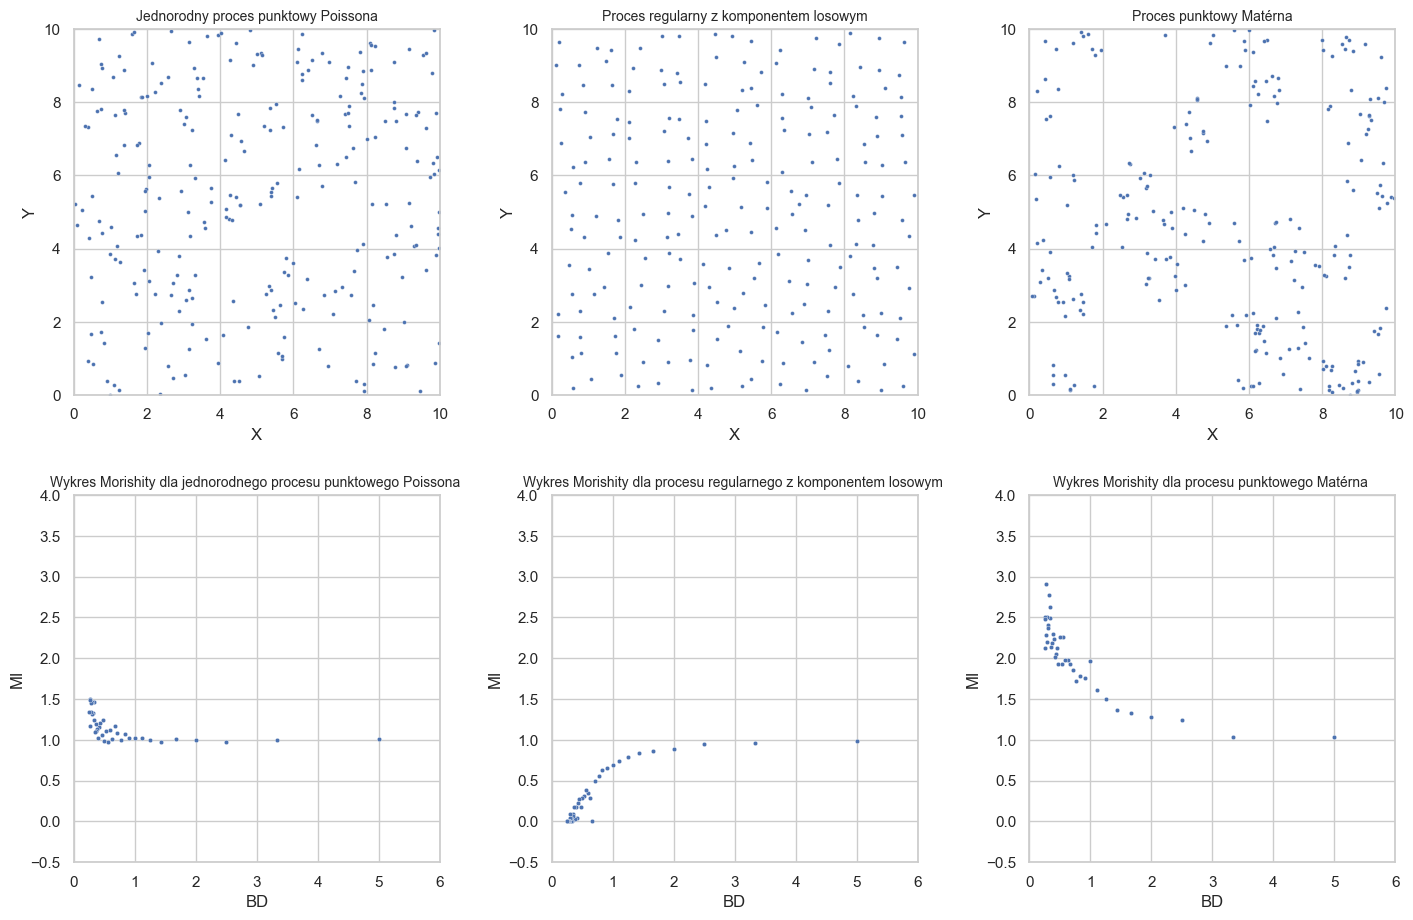

In [7]:
fig, axes = plt.subplots(2, 3, figsize = (15,10))
fig.tight_layout(pad=4.0)


sns.scatterplot(data = df1, x = "X", y = "Y", s = 8,ax=axes[0][0])
axes[0][0].axis('square')
axes[0][0].set_ylim([0,10]);
axes[0][0].set_xlim([0,10]);
axes[0][0].set_title("Jednorodny proces punktowy Poissona", fontsize = 10)

sns.scatterplot(data = df2, x = "X", y = "Y", s = 8,ax=axes[0][1])
axes[0][1].axis('square')
axes[0][1].set_ylim([0,10]);
axes[0][1].set_xlim([0,10]);
axes[0][1].set_title("Proces regularny z komponentem losowym", fontsize = 10)

sns.scatterplot(data = df3, x = "X", y = "Y", s = 8,ax=axes[0][2])
axes[0][2].axis('square')
axes[0][2].set_ylim([0,10]);
axes[0][2].set_xlim([0,10]);
axes[0][2].set_title("Proces punktowy Matérna", fontsize = 10)

axes[1][0].set_title("Wykres Morishity dla jednorodnego procesu punktowego Poissona ", fontsize = 10)
sns.scatterplot(df1m,x='BD',y='MI',s=10,ax=axes[1][0])
axes[1][0].set_ylim([-0.5,4]);
axes[1][0].set_xlim([0,6]);

axes[1][1].set_title("Wykres Morishity dla procesu regularnego z komponentem losowym ", fontsize = 10)
sns.scatterplot(df2m,x='BD',y='MI',s=10,ax=axes[1][1])
axes[1][1].set_ylim([-0.5,4]);
axes[1][1].set_xlim([0,6]);

axes[1][2].set_title("Wykres Morishity dla procesu punktowego Matérna ", fontsize = 10)
sns.scatterplot(df3m,x='BD',y='MI',s=10,ax=axes[1][2])
axes[1][2].set_ylim([-0.5,4]);
axes[1][2].set_xlim([0,6]);

### Zadanie 2: Wykres Fry (20 pkt)

Przygotuj funkcję `fry_plot_data()`, która będzie generować dane niezbędne do wykonania wykresu Fry.

Następnie wykorzystaj przygotowaną funkcję do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów punktowych zestawionych z rozkładami punktów na podstawie których zostały wykonane. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy Fry w dolnym wierszu figury.

Algorytm postępowania: <br/>
Traktując kolejno każdy punkt analizowanego rozkładu jako początek układu współrzędnych zapisujemy współrzędne pozostałych punktów względem niego.
Rezultatem jest zbiór współrzędnych $n(n-1)$ punktów, gdzie $n$ to liczba punktów w analizowanym rozkładzie.

#### a) Przygotowanie funkcji

In [8]:
def fry_plot_data(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    fry_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """  
    fry_points = []
    pts = np.array([points["X"], points["Y"]])
    pts = pts.transpose()
    for pt in pts:
        res = pts - pt
        res = res[res != [0, 0]]
        res = res.reshape((-1, 2))
        fry_points.extend(res)
    fry_points = np.array(fry_points).transpose()
    return pd.DataFrame({"X" : fry_points[0], "Y" : fry_points[1]})

#### b) Wygenerowanie danych

In [9]:
df1f = fry_plot_data(df1)
df2f = fry_plot_data(df2)
df3f = fry_plot_data(df3)

#### c) Wizualizacja

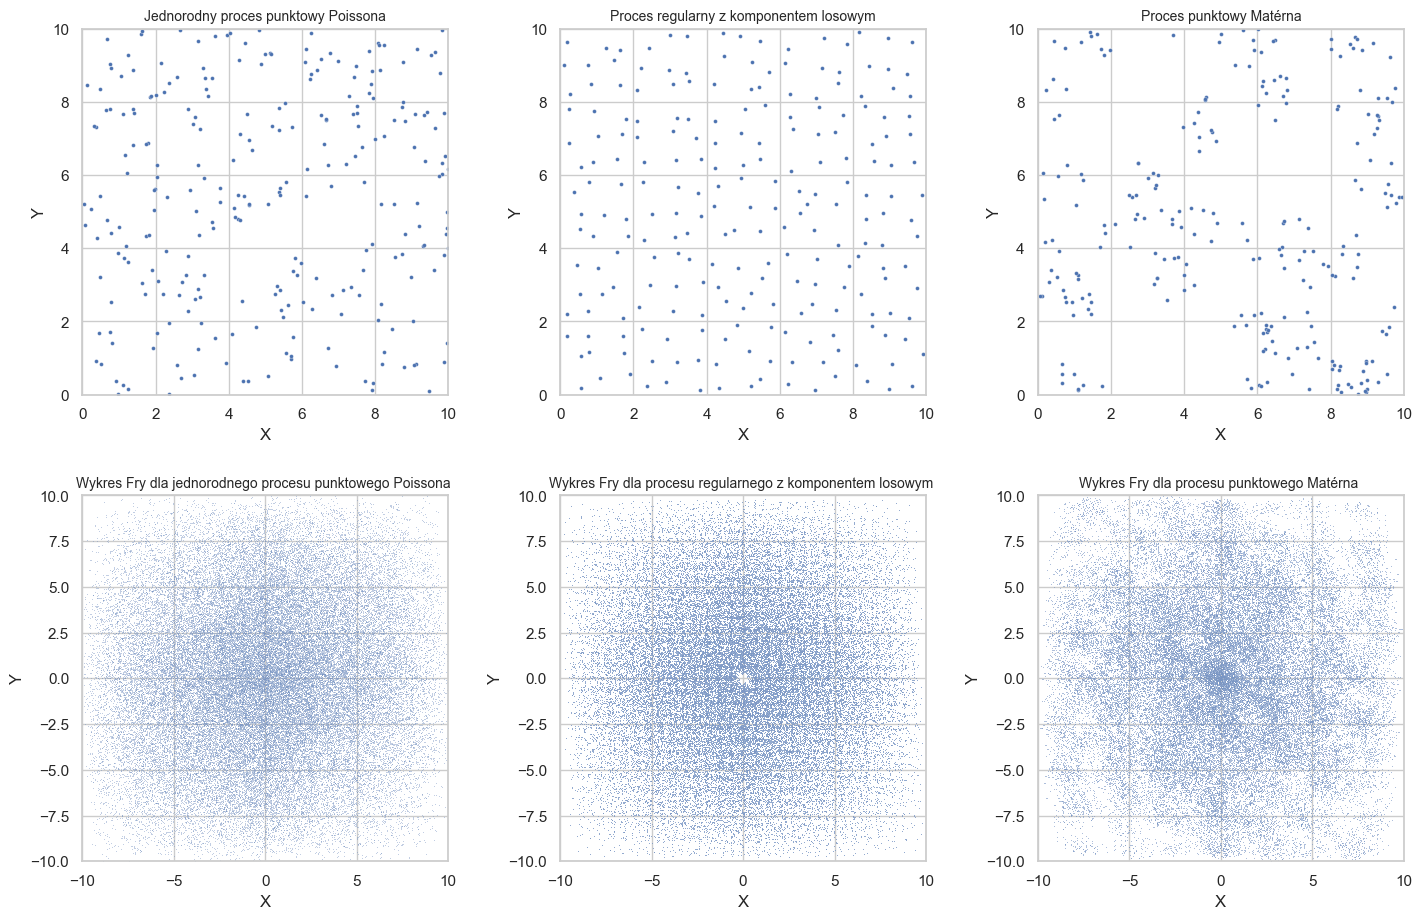

In [10]:
fig, axes = plt.subplots(2, 3, figsize = (15,10))
fig.tight_layout(pad=4.0)

sns.scatterplot(data = df1, x = "X", y = "Y", s = 8,ax=axes[0][0])
axes[0][0].axis('square')
axes[0][0].set_ylim([0,10]);
axes[0][0].set_xlim([0,10]);
axes[0][0].set_title("Jednorodny proces punktowy Poissona", fontsize = 10)

sns.scatterplot(data = df2, x = "X", y = "Y", s = 8,ax=axes[0][1])
axes[0][1].axis('square')
axes[0][1].set_ylim([0,10]);
axes[0][1].set_xlim([0,10]);
axes[0][1].set_title("Proces regularny z komponentem losowym", fontsize = 10)

sns.scatterplot(data = df3, x = "X", y = "Y", s = 8,ax=axes[0][2])
axes[0][2].axis('square')
axes[0][2].set_ylim([0,10]);
axes[0][2].set_xlim([0,10]);
axes[0][2].set_title("Proces punktowy Matérna", fontsize = 10)

axes[1][0].set_title("Wykres Fry dla jednorodnego procesu punktowego Poissona ", fontsize = 10)
sns.scatterplot(df1f,x='X',y='Y',s=0.5,ax=axes[1][0],alpha=0.5)
axes[1][0].axis('square')
axes[1][0].set_ylim([-10,10]);
axes[1][0].set_xlim([-10,10]);

axes[1][1].set_title("Wykres Fry dla procesu regularnego z komponentem losowym ", fontsize = 10)
sns.scatterplot(df2f,x='X',y='Y',s=0.5,ax=axes[1][1])
axes[1][1].axis('square')
axes[1][1].set_ylim([-10,10]);
axes[1][1].set_xlim([-10,10]);


axes[1][2].set_title("Wykres Fry dla procesu punktowego Matérna ", fontsize = 10)
sns.scatterplot(df3f,x='X',y='Y',s=0.5,ax=axes[1][2],alpha=0.7)
axes[1][2].axis('square')
axes[1][2].set_ylim([-10,10]);
axes[1][2].set_xlim([-10,10]);